In [1]:
clear all
addpath('./Biblioteca')
graphics_toolkit ("gnuplot"); %% Comando solo para jupyter notebooks


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.


 Muestreando con matrices aleatorias talla n = 2
 Muestreando con matrices aleatorias talla n = 3
 Muestreando con matrices aleatorias talla n = 5
 Muestreando con matrices aleatorias talla n = 8
 Muestreando con matrices aleatorias talla n = 13
 Muestreando con matrices aleatorias talla n = 21
 Muestreando con matrices aleatorias talla n = 34
 Muestreando con matrices aleatorias talla n = 55
 Muestreando con matrices aleatorias talla n = 89
 Muestreando con matrices aleatorias talla n = 144
 Muestreando con matrices aleatorias talla n = 233
 Muestreando con matrices aleatorias talla n = 377
    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14

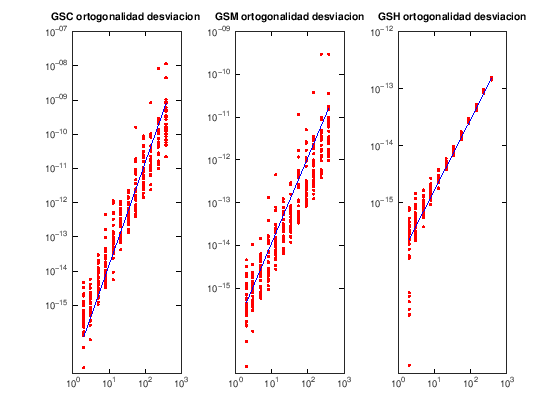

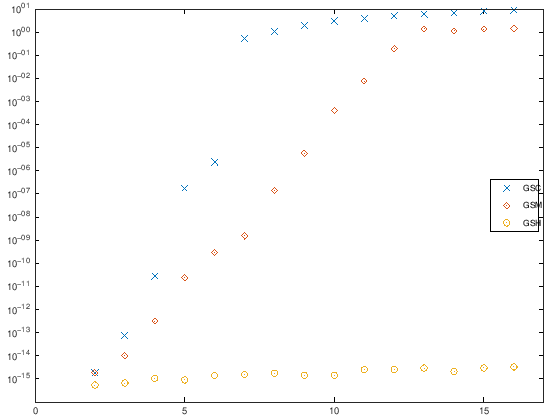

In [2]:
tic;
clear all;
% long=Numero de puntos a tomar de la secuencia de Fibonacci
long= 12;
% muestras= numero de matrices aleatorias de talla n(i)x n(i) 
% del numero n(i) de la secuencia de Fibonacci. Calculamos sus 
% descomposiciones mediante varios metodos y hayamos la 
% desviacion correspondiente a cada metodo.
muestras=30;
n=1:long; % Creamos un array vacio que va a contener la sucesion de Fibonacci
n(1)=2; % Colocamos un 2 en la primera posicion del array 
        % de Fibonacci (2) como el primero de la sucesion  (2 3 5 8...)
n(2)=3; % Colocamos el siguiente numero de la sucecion seguidamente 
% Mediante este bucle llenamos el array con mas numeros de la sucecion
% de Fibonacci hasta el numero que ocupa la posicion long
for i=3:long 
n(i) = n(i-1)+n(i-2); % Metodo recursivo
end
nrms1=zeros(muestras,long); % Almacena errores en cada dim para GSC
nrms2=zeros(muestras,long); % Almacena errores en cada dim para GSM
nrms3=zeros(muestras,long); % Almacena errores en cada dim para GSH


for i=1:long
    disp([' Muestreando con matrices aleatorias talla n = ',num2str(n(i))])
for j=1:muestras
a = rand(n(i)); % crea una matriz con entradas aleatorias de dimension n(i)
[q1,r1]= gramschmidt(a); % QR clasico via GSC sobre la matriz a
[q2,r2]= modgramschmidt(a); % QR via GSM sobre la matriz a
[q3,r3]= Householdergramschmidt(a); % QR via GSH sobre la matriz a
nrms1(j,i) = norm(q1'*q1-eye(n(i)),inf); % desviacion de ortogonalidad
nrms2(j,i) = norm(q2'*q2-eye(n(i)),inf); % desviacion de ortogonalidad
nrms3(j,i) = norm(q3'*q3-eye(n(i)),inf); % desviacion de ortogonalidad
end
end

% Hacemos graficos de los resultados con ajuste lineal para cada metodo
figure(1);
subplot(1,3,1), % Parte izquierda 
loglog(n,nrms1',"r.",n,n.^3/n(long)^3*mean(nrms1(:,long)),'b'); % Linea de orden O(n^3)
title('GSC ortogonalidad desviacion ')
subplot(1,3,2), % Parte central
loglog(n,nrms2',"r.",n,n.^2/n(long)^2*mean(nrms2(:,long)),'b'); % Linea de orden O(n^2)
title('GSM ortogonalidad desviacion')
subplot(1,3,3), % Parte derecha 
loglog(n,nrms3',"r.",n,n.^(1.24)/n(long)^(1.24)*mean(nrms3(:,long)),'b');
title('GSH ortogonalidad desviacion')
% Con 1.24 en nrms3 se ve mejor ajuste de la recta. Orden simple ==1
% La precision se ve segun estan dispersos los puntos para cada valor

% Ahora calculamos los datos necesarios para pintar la figura 2 
m=[1:16];
nrms_1=[];
nrms_2=[];
nrms_3=[];
for i=1:16
h=hilb(i); % Generamos las matrices de Hilbert 
[q1,r1]= gramschmidt(h); % QR clasico via GSC
[q2,r2]= modgramschmidt(h); % QR via GSM
[q3,r3]= Householdergramschmidt(h); % QR via GSH
nrms_1(i) = norm(q1'*q1-eye(i),inf); % desviacion de ortogonalidad
nrms_2(i) = norm(q2'*q2-eye(i),inf); % desviacion de ortogonalidad
nrms_3(i) = norm(q3'*q3-eye(i),inf); % desviacion de ortogonalidad
end
% En total tenemos 16 matrices de Hilbert de talla mxm donde m 
% va desde 1 hasta 16. Luego, horizontalmente necesitamos 16 puntos 
%y para el eje de abscisas vemos la tendencia con escala logaritmica
figure(2)
semilogy(m,nrms_1,'x',m,nrms_2,'d',m,nrms_3,'o');
legend('GSC','GSM','GSH',"location","east");
xlim([0,17]);
toc;